In [7]:
### SGD ###
import torch

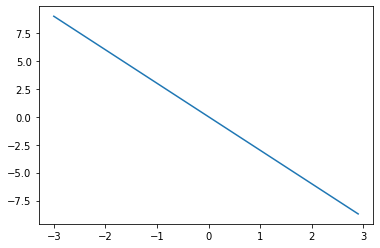

In [8]:
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * x

import matplotlib.pyplot as plt
plt.plot(x.numpy(), f.numpy())
plt.show()

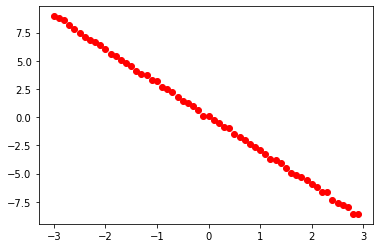

In [9]:
Y = f + 0.1 * torch.randn(x.size())
plt.plot(x.numpy(), y.numpy(), "ro")
plt.show()

In [10]:
def forward(x):
    return w * x

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [13]:
lr = 0.1
cost = []

for epoch in range(4):
    total = 0

    for x, y in zip(X, Y):
        yhat = forward(x)
        loss = criterion(yhat, y)
        loss.backward()

        w.data = w.data - lr * w.grad.data
        b.data = w.data - lr * b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()
        total += loss.item()

    cost.append(total)

AttributeError: 'NoneType' object has no attribute 'data'

In [15]:
from torch.utils.data import Dataset

class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = -3 * X + 1
        self.len = self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [17]:
dataset = Data()

In [19]:
x, y = dataset[0:3]
print(x, y)

tensor([[-3.0000],
        [-2.9000],
        [-2.8000]]) tensor([[10.0000],
        [ 9.7000],
        [ 9.4000]])


In [20]:
trainloader = DataLoader(dataset=dataset, batch_size=1)

NameError: name 'DataLoader' is not defined

In [21]:
for x, y in trainloader:
    yhat = forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    w.data = w.data - lr * w.grad.data
    b.data = w.data - lr * b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()

NameError: name 'trainloader' is not defined